# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("yellow_tripdata_2020-01.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# EDA

In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [8]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [10]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [11]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [12]:
(65441/len(df))*100

1.021716132126611

In [13]:
df.dropna(inplace= True)

In [14]:
df.shape

(6339567, 5)

In [15]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [16]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [17]:
df.duplicated().sum()

3331706

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(3007861, 5)

In [20]:
df['passenger_count'].value_counts(normalize = True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [21]:
df['payment_type'].value_counts(normalize = True)

1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In [22]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [23]:
df['payment_type'].replace([1,2], ['Card', 'Cash'], inplace = True)

In [24]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [25]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [26]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1f13c4e2340>,
 'caps': [<matplotlib.lines.Line2D at 0x1f13c4e29a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f13c4ceeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f13c4f2100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f13c4f2490>],
 'means': []}

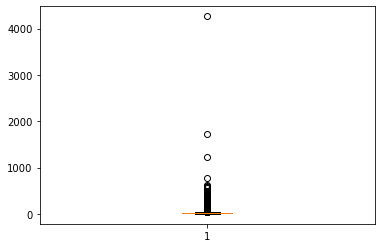

In [27]:
plt.boxplot(df['fare_amount'])

In [28]:
for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [29]:
df.shape

(2297908, 5)

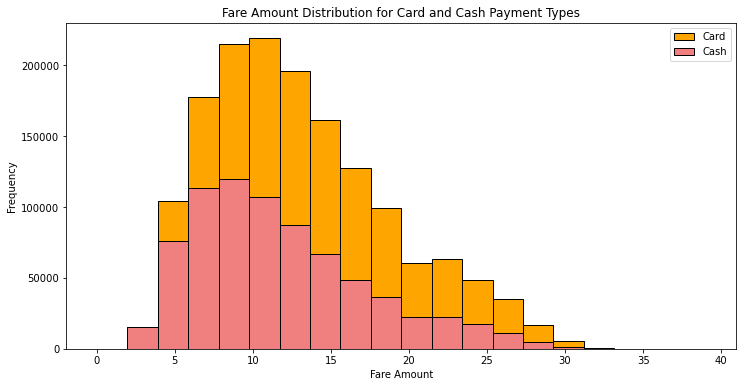

In [30]:
plt.figure(figsize=(12, 6))

plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], 
         histtype='barstacked', 
         label='Card', 
         edgecolor = 'k',
         color='orange', 
         bins=20)  

plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], 
         histtype='barstacked', 
         label='Cash', 
         edgecolor = 'k', 
         color='lightcoral', 
         bins=20)  

plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Fare Amount Distribution for Card and Cash Payment Types')
plt.legend()

plt.show()


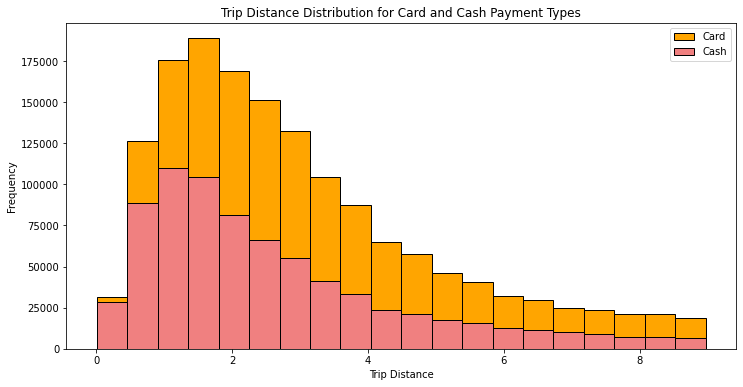

In [31]:
plt.figure(figsize=(12, 6))

plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], 
         histtype='barstacked', 
         label='Card', 
         edgecolor = 'k',
         color='orange', 
         bins=20)  

plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], 
         histtype='barstacked', 
         label='Cash', 
         edgecolor = 'k', 
         color='lightcoral', 
         bins=20)  

plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Trip Distance Distribution for Card and Cash Payment Types')
plt.legend()

plt.show()

In [32]:
df.groupby('payment_type').agg({
    'fare_amount': ['mean', 'std'],
    'trip_distance': ['mean', 'std']
})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

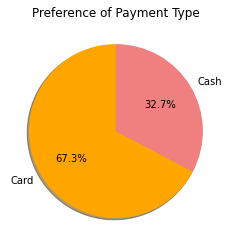

In [33]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['orange', 'lightcoral'])
plt.show()


In [34]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [35]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [36]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [37]:
import pandas as pd

pay_df = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])

pay_df['payment_type'] = ['Card', 'Cash'] 

pay_df.iloc[0, 1:] = passenger_count.iloc[0:5, -1]  
pay_df.iloc[1, 1:] = passenger_count.iloc[5:10, -1] 

pay_df


,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


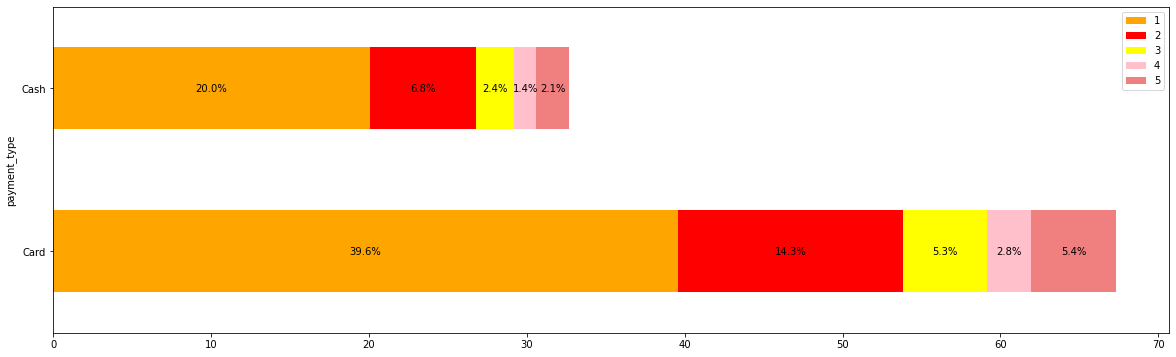

In [38]:
fig, ax = plt.subplots(figsize=(20, 6))
pay_df.plot(x='payment_type', kind='barh', stacked=True, ax=ax, color=['orange', 'red', 'yellow', 'pink', 'lightcoral'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.1f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')


# Hypothesis Testing

**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash.

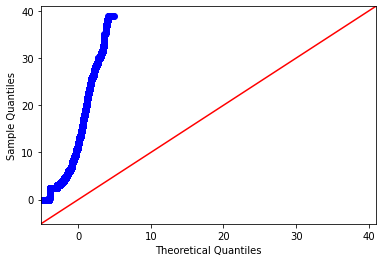

In [39]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [40]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333


In [42]:
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [44]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)

print("T statistic" , t_stats)
print("p-value", p_value)

T statistic 169.2111527245052
p-value 0.0


# Conclusion

**Reject the null hypothesis.**
*There is a statistically significant difference in average fares between customers who use credit cards and those who use cash, meaning that the method of payment is associated with different average fares*

*Since the p-value is significantly less than the common significance level (e.g., 0.05), we have strong evidence to reject the null hypothesis.*

*The very high T-statistic further supports that the difference between the average fares for customers using credit cards and those using cash is statistically significant.*